In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Virtual_internship/titanic_survival/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Virtual_internship/titanic_survival/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# removing features and filling null values

In [ ]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [ ]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
train['Embarked'].fillna('S',inplace=True)

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [ ]:
fill_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [ ]:
train['Age'][np.isnan(train['Age'])]= fill_age

<ipython-input-15-49b557e111ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])]= fill_age


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
fill_age_test=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)

In [ ]:
test['Age'][np.isnan(test['Age'])]= fill_age_test

<ipython-input-18-661e29fd8ff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][np.isnan(test['Age'])]= fill_age_test


In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
train[['Pclass','Survived']].groupby('Pclass').mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


<ipython-input-24-22ed6932e5e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

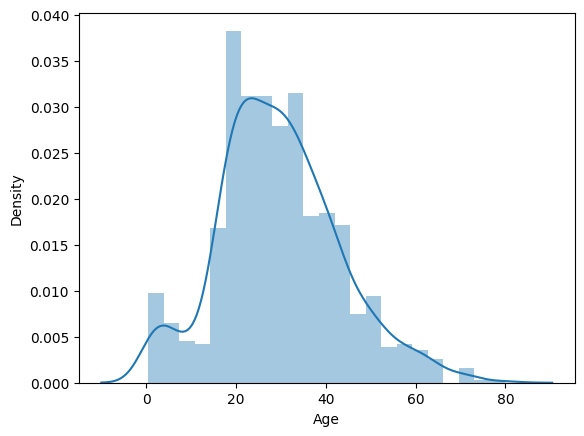

In [ ]:
sns.distplot(train['Age'])

<Axes: ylabel='Age'>

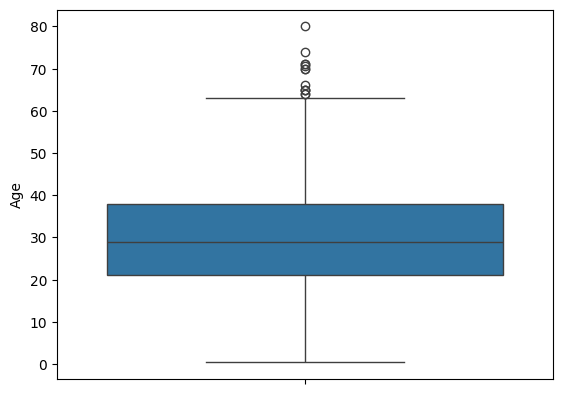

In [ ]:
sns.boxplot(train['Age'])


In [ ]:
train[train['Age']>75]['Survived'].value_counts()

Survived
1    1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

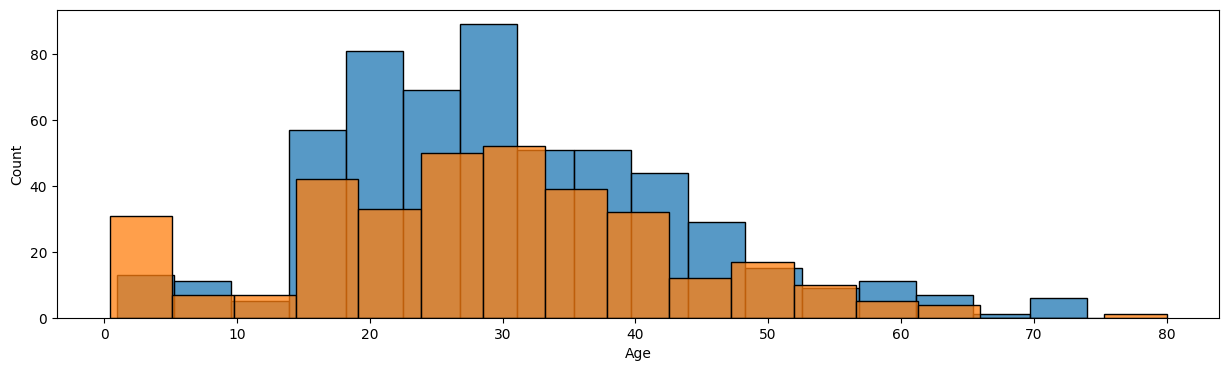

In [ ]:
plt.subplots(figsize=(15,4))
sns.histplot(train[train['Survived']==0]['Age'])
sns.histplot(train[train['Survived']==1]['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

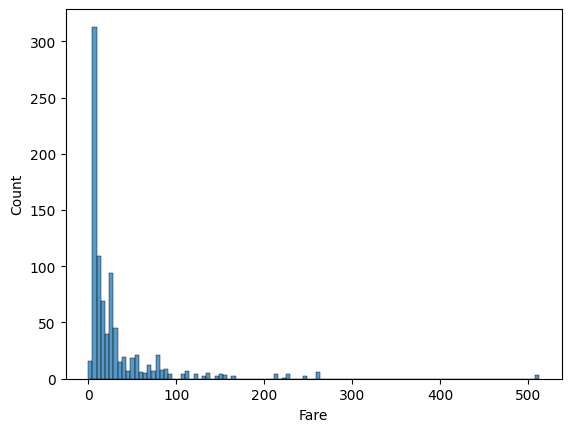

In [ ]:
sns.histplot(train['Fare'])

<Axes: ylabel='Fare'>

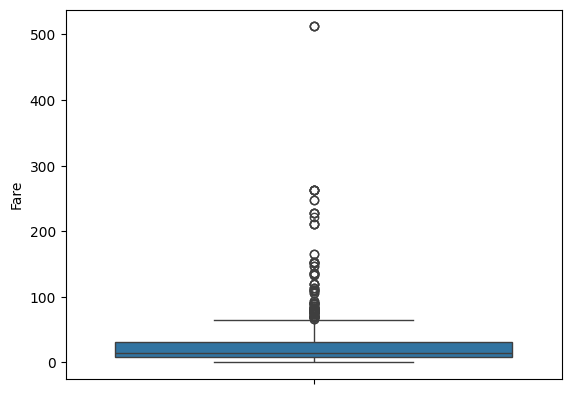

In [ ]:
sns.boxplot(train['Fare'])

In [ ]:
train[train['Fare']>400]['Survived'].value_counts()

Survived
1    3
Name: count, dtype: int64

In [ ]:
train[train['Fare']>200]['Survived'].value_counts()

Survived
1    14
0     6
Name: count, dtype: int64

<ipython-input-32-130bed88962b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==0]['Fare'])
<ipython-input-32-130bed88962b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

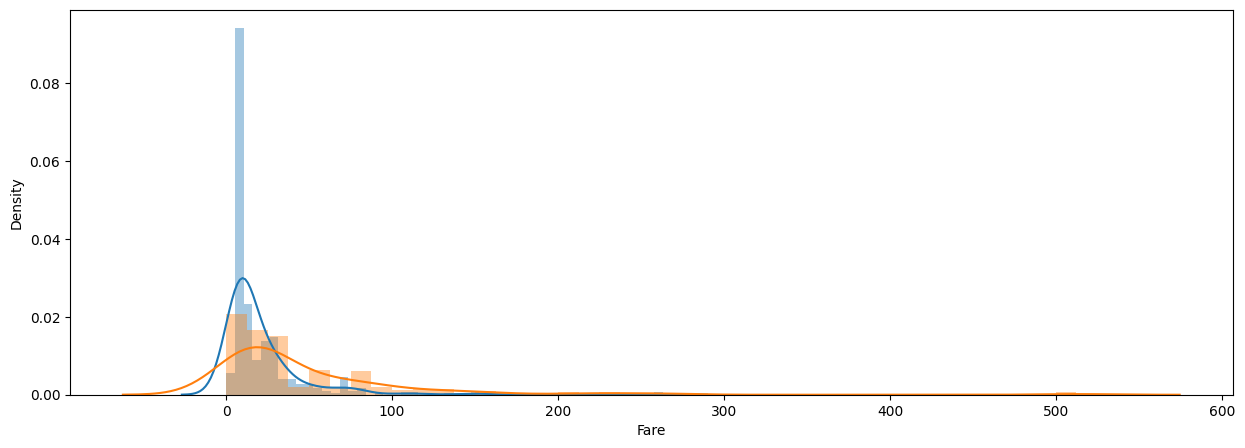

In [ ]:
plt.subplots(figsize=(15,5))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

In [ ]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [ ]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [ ]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [ ]:
train[['family','Survived']].groupby('family').mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [ ]:
def family_size(number):
  if number==1:
    return 'alone'
  elif number>=2 and number<=4:
    return 'small'
  else:
    return 'large'

In [ ]:
train['family_size']=train['family'].apply(family_size)
test['family_size']=test['family'].apply(family_size)

In [ ]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [ ]:
y=train['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
train.drop(columns=['Survived'],inplace=True)

In [ ]:
train.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,family_size
0,1,3,male,22.0,A/5 21171,7.2500,S,small
1,2,1,female,38.0,PC 17599,71.2833,C,small
2,3,3,female,26.0,STON/O2. 3101282,7.9250,S,alone
3,4,1,female,35.0,113803,53.1000,S,small
4,5,3,male,35.0,373450,8.0500,S,alone


In [ ]:
print(train.shape)
print(test.shape)

(891, 8)
(418, 8)


In [ ]:
final = pd.concat([train, test], ignore_index=True)

In [ ]:
final.shape

(1309, 8)

In [ ]:
final.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,family_size
0,1,3,male,22.0,A/5 21171,7.2500,S,small
1,2,1,female,38.0,PC 17599,71.2833,C,small
2,3,3,female,26.0,STON/O2. 3101282,7.9250,S,alone
3,4,1,female,35.0,113803,53.1000,S,small
4,5,3,male,35.0,373450,8.0500,S,alone


In [ ]:
final.drop(columns=['PassengerId','Ticket'],inplace=True)

In [ ]:
final.head()

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,22.0,7.2500,S,small
1,1,female,38.0,71.2833,C,small
2,3,female,26.0,7.9250,S,alone
3,1,female,35.0,53.1000,S,small
4,3,male,35.0,8.0500,S,alone


In [ ]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)

In [ ]:
X=final.head(891).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
y.shape

(891,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred.shape

(179,)

In [ ]:
y_test.shape


(179,)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7932960893854749

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# lets Train a Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.8156424581005587


We see that we can get a better accuracy by training data on a random forest model

# Which features are most likely lead to the survival of the passenger

In [ ]:
feature_names = final.columns

In [ ]:
rf_feature_importances = rf_clf.feature_importances_
rf_features_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances})
rf_features_df = rf_features_df.sort_values(by='Importance', ascending=False)

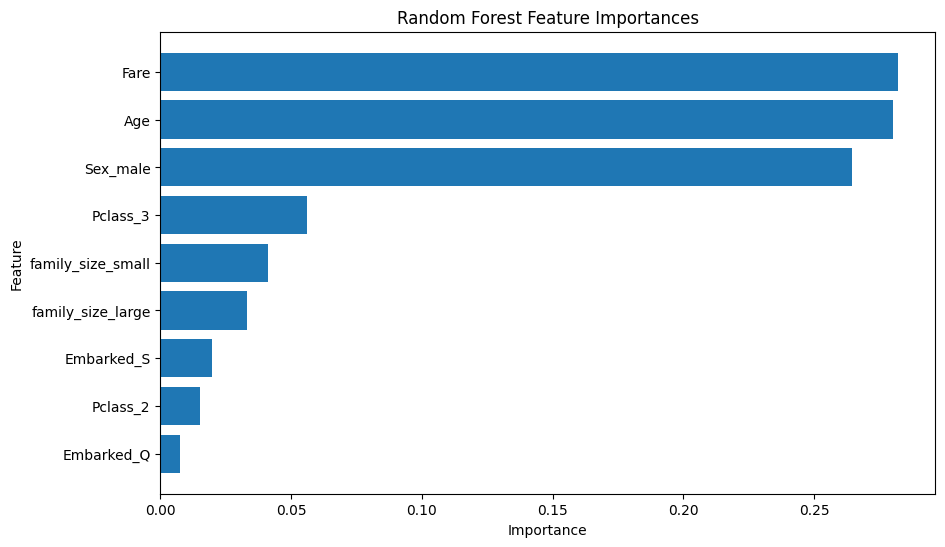

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(rf_features_df['Feature'], rf_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## We can conclude that the features 'Fare', 'Age' and 'Sex' have a relatively higher importance as compared to the other features